In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
#|hide
%pip install -Uqq pandas matplotlib html5lib

Note: you may need to restart the kernel to use updated packages.


# Pandas Tutorial

Further documentation:

* [Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* [Three Part Tutorial from Greg Reda](http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/)
* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
* [Official Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)

More advanced:

* [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro)

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
%matplotlib inline

# Series

Series are one-dimensional objects like lists, numpy arrays or table columns. Each series has an index that can be used to find elements. By default this is an integer from 0 to n-1.

In [ ]:
values = [3, "foo", 3.14, 42, -23, "bar"]

In [ ]:
s = pd.Series(values)

In [ ]:
print(s)

0       3
1     foo
2    3.14
3      42
4     -23
5     bar
dtype: object


In [ ]:
s[3]

42

In [ ]:
index = ["a", "b", "c", "d", "e", "f"]

In [ ]:
s = pd.Series(values, index=index)

In [ ]:
s

a       3
b     foo
c    3.14
d      42
e     -23
f     bar
dtype: object

In [ ]:
s["d"]

42

In [ ]:
s[["a", "b", "c"]]

a       3
b     foo
c    3.14
dtype: object

In [ ]:
s = pd.Series(np.arange(10), index=np.arange(10, 20))
s[s > 5]

16    6
17    7
18    8
19    9
dtype: int64

# DataFrames

Are two-dimensional data structures similar to tables or Excel sheets. Basically a collection of Series. We use the table of the [largest cities in Europe from wikipedia](https://de.wikipedia.org/wiki/Liste_der_gr%C3%B6%C3%9Ften_St%C3%A4dte_Europas) as an example here.



In [ ]:
cities_url = "https://en.wikipedia.org/wiki/List_of_largest_cities"
tables = pd.read_html(cities_url, header=0, flavor="bs4")

In [ ]:
df = tables[1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   City[a]                          82 non-null     object
 1   Country                          82 non-null     object
 2   UN 2018 population estimates[b]  82 non-null     object
 3   City proper[c]                   82 non-null     object
 4   City proper[c].1                 82 non-null     object
 5   City proper[c].2                 82 non-null     object
 6   City proper[c].3                 82 non-null     object
 7   Urban area[8]                    82 non-null     object
 8   Urban area[8].1                  82 non-null     object
 9   Urban area[8].2                  82 non-null     object
 10  Metropolitan area[d]             82 non-null     object
 11  Metropolitan area[d].1           82 non-null     object
 12  Metropolitan area[d].2           82 no

In [ ]:
df.memory_usage(deep=True)

Index                               132
City[a]                            4730
Country                            4621
UN 2018 population estimates[b]    4681
City proper[c]                     5306
City proper[c].1                   4727
City proper[c].2                   4462
City proper[c].3                   4945
Urban area[8]                      4690
Urban area[8].1                    4381
Urban area[8].2                    4493
Metropolitan area[d]               5269
Metropolitan area[d].1             5101
Metropolitan area[d].2             5236
dtype: int64

## Method Chaining

In [ ]:
df = (df.dropna()
        .rename(columns=df.iloc[0]).drop(df.index[0])
        .rename(columns=str.lower)
        .reset_index()      
        .rename(columns={"city[a]": "name", "index": "rank"})      
        .assign(country=lambda x: pd.Categorical(x["country"]),
                name=lambda x: pd.Categorical(x["name"]),
                population_est=lambda x: x["un 2018 population estimates[b]"].astype(np.int32),
                definition=lambda x: pd.Categorical(x["definition"]),
                density=lambda x: x["density (/km2)"].iloc[:, 0].str.replace(",", "").str.extract(r'(\d+)').astype(np.float32),
                rank=lambda x: x["rank"] - 1
        )
)[["rank", "name", "country", "definition", "population_est", "density"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   rank            81 non-null     int64   
 1   name            81 non-null     category
 2   country         81 non-null     category
 3   definition      81 non-null     category
 4   population_est  81 non-null     int32   
 5   density         74 non-null     float32 
dtypes: category(3), float32(1), int32(1), int64(1)
memory usage: 6.9 KB


In [ ]:
df.head()

,rank,name,country,definition,population_est,density
0,1,Tokyo,Japan,Metropolis prefecture,37468000,6169.0
1,2,Delhi,India,Municipal corporation,28514000,11289.0
2,3,Shanghai,China,Municipality,25582000,3922.0
3,4,São Paulo,Brazil,Municipality,21650000,8055.0
4,5,Mexico City,Mexico,City-state,21581000,6202.0


In [ ]:
df.sort_values(by="density", ascending=False).head()

,rank,name,country,definition,population_est,density
16,17,Manila,Philippines,Capital city,13482000,41399.0
8,9,Dhaka,Bangladesh,Capital city,19578000,26349.0
15,16,Kolkata,India,Municipal corporation,14681000,21935.0
6,7,Mumbai,India,Municipal corporation,19980000,20694.0
27,28,Paris,France,Commune,10901000,20460.0


## Indices

### Simple

In [ ]:
ds = df.set_index("rank")

In [ ]:
ds.loc[2:5, "country": "population_est"].head()

,country,definition,population_est
rank,,,
2,India,Municipal corporation,28514000
3,China,Municipality,25582000
4,Brazil,Municipality,21650000
5,Mexico,City-state,21581000


In [ ]:
ds.loc[ds.name.isin(("Paris", "Dhaka")), "country": "population_est"].head()

,country,definition,population_est
rank,,,
9,Bangladesh,Capital city,19578000
28,France,Commune,10901000


### Multidimensional

In [ ]:
df.head()

,rank,name,country,definition,population_est,density
0,1,Tokyo,Japan,Metropolis prefecture,37468000,6169.0
1,2,Delhi,India,Municipal corporation,28514000,11289.0
2,3,Shanghai,China,Municipality,25582000,3922.0
3,4,São Paulo,Brazil,Municipality,21650000,8055.0
4,5,Mexico City,Mexico,City-state,21581000,6202.0


In [ ]:
ds = df.set_index(["country", "definition", "rank"]).sort_index()

In [ ]:
ds.loc["China",:,:]

name  population_est  density
definition                    rank                                    
City (sub-provincial)         22    Guangzhou        12638000   1950.0
                              25     Shenzhen        11908000   6111.0
                              40      Chengdu         8813000   1116.0
                              41      Nanjing         8245000   1103.0
                              42        Wuhan         8176000   1282.0
                              47        Xi'an         7444000    887.0
                              50     Hangzhou         7236000    570.0
                              52     Shenyang         6921000    639.0
                              60       Harbin         6115000    200.0
                              75      Qingdao         5381000      NaN
                              76       Dalian         5300000      NaN
                              80        Jinan         5052000    849.0
Municipality                  3      Shanghai        25582000   3922.0
                              8       Beijing        19618000   1334.0
                              14    Chongqing        14838000    389.0
                              20      Tianjin        13215000   1163.0
Prefecture-level city         49     Dongguan         7360000   3384.0
                              51       Foshan         7236000   1870.0
                              58       Suzhou         6339000   1263.0
Special administrative region 48    Hong Kong         7429000   6611.0

## Simple Plots

In [ ]:
size = (10, 5)

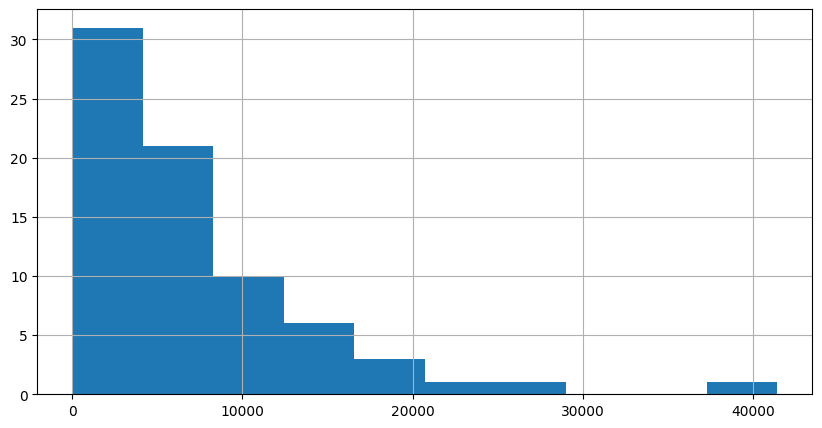

In [ ]:
ax = df.density.hist(figsize=size)

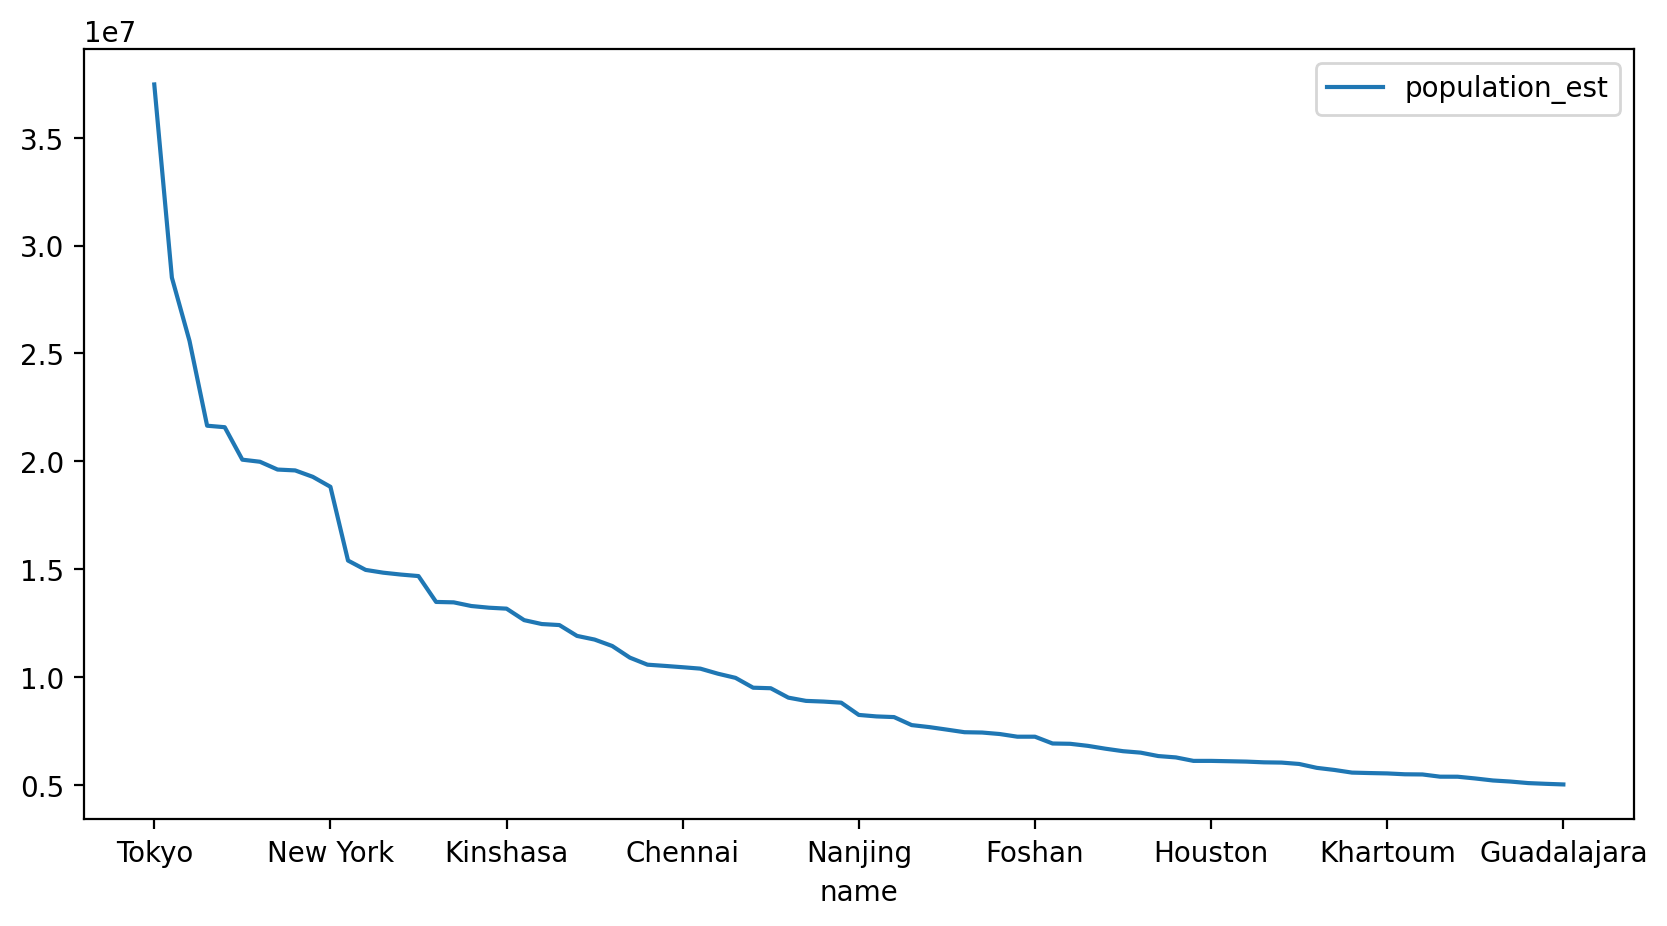

In [ ]:
ax = df.plot(x="name", y="population_est", figsize=size)

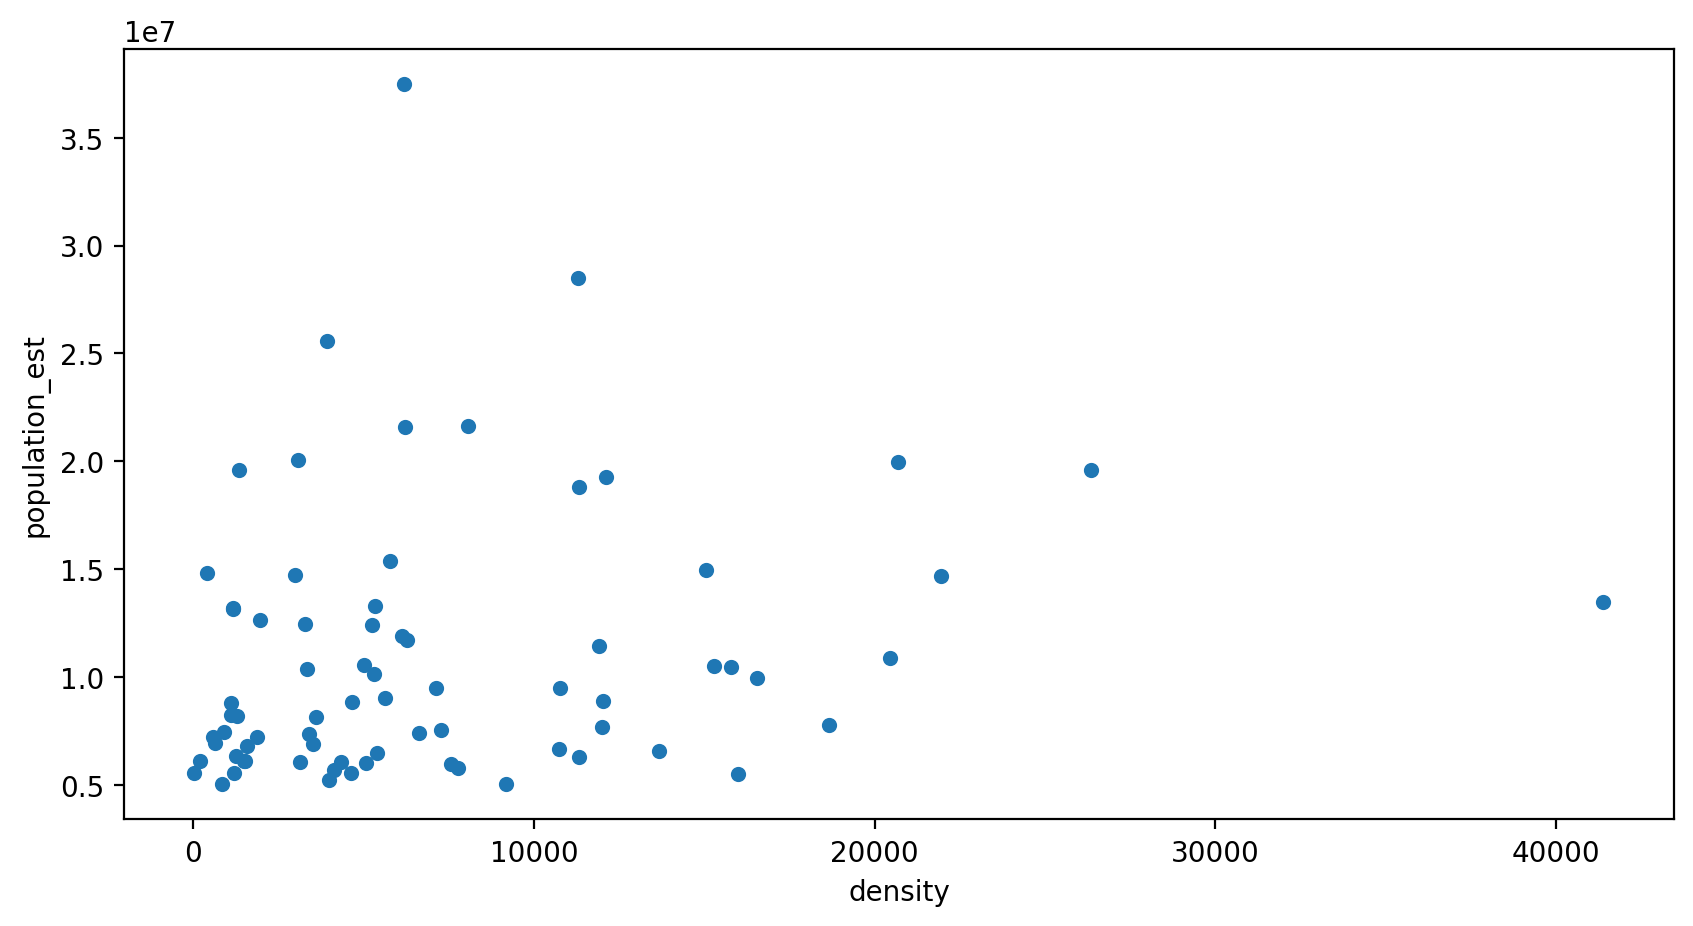

In [ ]:
ax = df.plot.scatter(x="density", y="population_est", figsize=size)

## Grouping

In [ ]:
dt = (df[["country", "population_est", "name"]]
      .groupby("country", observed=False)
      .agg({"population_est": "sum", "name": "count"})
      .rename(columns={"name": "cities"})
      .reset_index()
      .sort_values(by="cities", ascending=False)
      .head(12))
dt

,country,population_est,cities
6,China,194846000,20
34,United States,74865000,9
11,India,115074000,9
15,Japan,71807000,4
3,Brazil,40915000,3
20,Pakistan,27138000,2
23,Russia,17793000,2
17,Mexico,26604000,2
9,Egypt,25162000,2
28,Spain,11991000,2


## How often do which values occur in a column?

In [ ]:
dt.cities.value_counts()

cities
2     5
9     2
1     2
20    1
4     1
3     1
Name: count, dtype: int64

## Fetch the inhabitants per country

In [ ]:
countries_url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
tables = pd.read_html(countries_url, header=0, flavor="bs4", decimal=",", thousands=".")

In [ ]:
dc = tables[0]

In [ ]:
"1,34.5".replace(",.", "")

'1,34.5'

In [ ]:
dc = (dc.rename(columns=str.lower)
   .assign(
       population=lambda x: x["population"].str.replace(r"[.,]", "", regex=True).astype(np.int64),
       country=lambda x: pd.Categorical(x["country / dependency"])
   )
)[["country", "population"]]

In [ ]:
dc.head()

,country,population
0,World,8068346000
1,China,1411750000
2,India,1392329000
3,United States,335576000
4,Indonesia,279118866


### query

In [ ]:
dc.query("population > 10**6 and country in ('Niger', 'United States', 'India')")

,country,population
2,India,1392329000
3,United States,335576000
56,Niger,25369415


In [ ]:
dt

,country,population_est,cities
6,China,194846000,20
34,United States,74865000,9
11,India,115074000,9
15,Japan,71807000,4
3,Brazil,40915000,3
20,Pakistan,27138000,2
23,Russia,17793000,2
17,Mexico,26604000,2
9,Egypt,25162000,2
28,Spain,11991000,2


## Join - like in SQL

In [ ]:
dm = (pd.merge(dt, dc, on="country")[["country", "cities", "population_est", "population"]]
        .rename(columns={"population_est": "in_cities", "population": "total"}))
dm

,country,cities,in_cities,total
0,China,20,194846000,1411750000
1,United States,9,74865000,335576000
2,India,9,115074000,1392329000
3,Japan,4,71807000,124340000
4,Brazil,3,40915000,203062512
5,Pakistan,2,27138000,241499431
6,Russia,2,17793000,146424729
7,Mexico,2,26604000,129202482
8,Egypt,2,25162000,105481000
9,Spain,2,11991000,48345223


In [ ]:
dm["city_ratio"] = dm.in_cities / dm.total

In [ ]:
dm

,country,cities,in_cities,total,city_ratio
0,China,20,194846000,1411750000,0.138017
1,United States,9,74865000,335576000,0.223094
2,India,9,115074000,1392329000,0.082649
3,Japan,4,71807000,124340000,0.577505
4,Brazil,3,40915000,203062512,0.201490
5,Pakistan,2,27138000,241499431,0.112373
6,Russia,2,17793000,146424729,0.121516
7,Mexico,2,26604000,129202482,0.205909
8,Egypt,2,25162000,105481000,0.238545
9,Spain,2,11991000,48345223,0.248029


# Often used Operations

In [ ]:
df = pd.DataFrame(index=["A", "B", "C"])
df["name"] = ["foo", "bar", "baz"]
df["value"] = [23, 42, 28]

In [ ]:
df

,name,value
A,foo,23
B,bar,42
C,baz,28


In [ ]:
df.reset_index()

,index,name,value
0,A,foo,23
1,B,bar,42
2,C,baz,28


In [ ]:
dm = df.reset_index().melt(id_vars=["index"], value_name="new_value")
dm

,index,variable,new_value
0,A,name,foo
1,B,name,bar
2,C,name,baz
3,A,value,23
4,B,value,42
5,C,value,28


In [ ]:
dm.pivot(columns="variable", values="new_value", index="index")

variable,name,value
index,,
A,foo,23
B,bar,42
C,baz,28
